#Load Libraries
 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

#Import Image

In [52]:
leo = ImageOps.grayscale(Image.open("/content/lion.PNG"))
leo_arr = np.array(leo)

In [53]:
leo_arr, leo_arr.shape

(array([[255,   2,   5, ...,  32,  32,  20],
        [ 51,   3,  31, ..., 161, 162,  51],
        [255,  10,  58, ..., 168, 162,  51],
        ...,
        [255,  13,  89, ...,  62, 102,  51],
        [255,  20,  31, ...,  51,  51,  20],
        [255, 255,  51, ..., 255, 255, 255]], dtype=uint8), (220, 220))

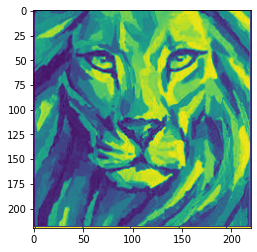

In [54]:
plt.imshow(leo)

In [55]:
def conv2d(image_arr, conv_filter):
    # copy image
    image_copy = np.copy(image_arr)
    # get image dims
    size_x, size_y = image_copy.shape

    # for each pixel (x, y) in the image
    for x in range(1,size_x-1):
        for y in range(1,size_y-1):
            # initial convolution ops result = 0
            convolution = 0.0
            # apply convolution on 3x3 patch of image with 3x3 filter \ kernel
            #   Source Image Patch (3x3)           Convolution Filter (3x3)     New Image - position (x,y) 
            # [x-1, y-1] [x, y-1] [x+1, y-1]      [f(0,0)] [f(0,1)] [f(0,2)]
            # [x-1, y  ] [ x, y ] [x+1, y  ]  *   [f(1,0)] [f(1,1)] [f(1,2)]     =    [NI(x, y)]
            # [x-1, y+1] [x, y+1] [x+1, y+1]      [f(2,0)] [f(2,1)] [f(2,2)]
            convolution = convolution + (image_arr[x - 1, y-1] * conv_filter[0][0])
            convolution = convolution + (image_arr[x, y-1] * conv_filter[0][1])
            convolution = convolution + (image_arr[x + 1, y-1] * conv_filter[0][2])

            convolution = convolution + (image_arr[x-1, y] * conv_filter[1][0])
            convolution = convolution + (image_arr[x, y] * conv_filter[1][1])
            convolution = convolution + (image_arr[x+1, y] * conv_filter[1][2])
            
            convolution = convolution + (image_arr[x-1, y+1] * conv_filter[2][0])
            convolution = convolution + (image_arr[x, y+1] * conv_filter[2][1])
            convolution = convolution + (image_arr[x+1, y+1] * conv_filter[2][2])
            filter_wt_sum = np.sum(conv_filter)
            # normalize to make filter weights add up to 1
            weight = 1 if filter_wt_sum == 0 else 1./filter_wt_sum
            convolution = convolution * weight
            # clip max \ min pixels
            if(convolution<0):
                convolution = 0
            if(convolution>255):
                convolution = 255
            # assign convolution ops result to new image pixel image_copy(x, y)
            image_copy[x, y] = convolution

    return image_copy



#Vertical Edge detection kernel

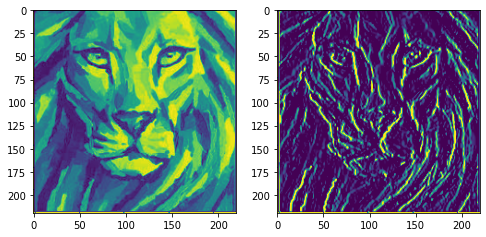

In [56]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=[[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);

##Edge detection Horizontal

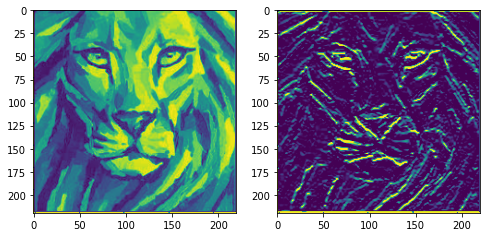

In [57]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=[[-1, 0, 1],
[-2, 0, 2],
[-1, 0, 1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);

##Edge detection Outline Kernel

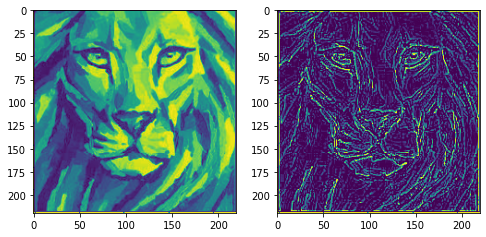

In [58]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=[[-1, -1, -1],
[-1, 8, -1],
[-1, -1, -1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);

##Emboss Kernel

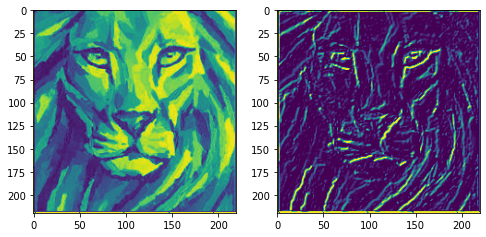

In [59]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=[[-1, -1, 0],
[-1, 0, 1],
[0, 1, 1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);

##Gausian Blus Kernel

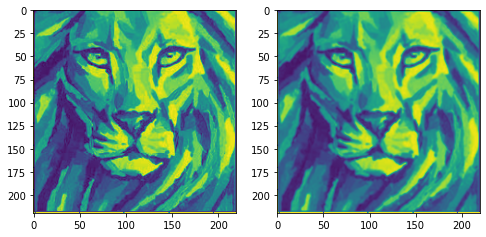

In [60]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=np.array([[1, 2, 1],
[2, 4, 2],
[1, 2, 1]])/16.)
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);

##Sharpen Kernel

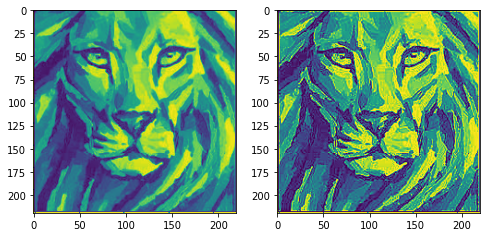

In [61]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=[[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);